In [1]:
import os
import shutil

import re
import time
import pandas as pd


csv_fileIEEE_SCOPUS = pd.read_csv('Data-25May/SCOPUS+IEEE_ALL_Man.csv',header=0, engine='python', warn_bad_lines=True, error_bad_lines=False)
#csv_fileSCOPUS = pd.read_csv('Data-25May/MT-SCOPUS-vf.csv',header=0, engine='python', warn_bad_lines=True, error_bad_lines=False)
#csv_fileSPRINGER = pd.read_csv('Data-25May/MT-SPRINGER-vf.csv',header=0, engine='python', warn_bad_lines=True, error_bad_lines=False)

csv_fileIEEE_SCOPUS

,Authors,Title,Year,Page start,Page end,Page count,Cited by,DOI,Link,Abstract,Author Keywords,Document Type,Source
0,"Kumaran A., Kellner T.",Babel: A machine transliteration workbench,2007,899,NaN,-898,NaN,10.1145/1277741.1277967,https://www.scopus.com/inward/record.uri?eid=2...,[No abstract available],Crosslingual information retrieval; Machine tr...,Conference Paper,Scopus
1,Housel B.C.,On inverse translation of machine language,1974,752,NaN,-751,NaN,10.1145/1408800.1408929,https://www.scopus.com/inward/record.uri?eid=2...,The goals of my research were to investigate s...,NaN,Conference Paper,Scopus
2,"Kim Y., Chang J.-H., Zhang B.-T.",Target word selection using WordNet and data-d...,2002,607,NaN,-606,NaN,10.1007/3-540-45683-x_77,https://www.scopus.com/inward/record.uri?eid=2...,[No abstract available],NaN,Conference Paper,Scopus
3,Quillian M.R.,Simulation of human understanding of language,1961,406,NaN,-405,3.0,10.1145/366696.366784,https://www.scopus.com/inward/record.uri?eid=2...,[No abstract available],artificial intelligence; computer simulation; ...,Article,Scopus
4,"Shukur Z., Zin A.M., Ban A.",M2Z: A Tool for Translating a Natural language...,2002,406,NaN,-405,3.0,10.1007/3-540-36103-0_42,https://www.scopus.com/inward/record.uri?eid=2...,This paper discusses the design of a tool for ...,Formal methods; Linguistic; Machine translatio...,Conference Paper,Scopus
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,"Bai Y., Ma K.",Interuniversity task-based cross-disciplinary ...,2010,V2297,V2301,#VALUE!,NaN,10.1109/ICEIT.2010.5607576,https://www.scopus.com/inward/record.uri?eid=2...,This paper attempts to construct an interunive...,Collaborative learning; Corpus; Machine transl...,Conference Paper,Scopus
4503,"Riofrio C. G.-E., Sucunuta E. M.-E.","Using ""Natural Language Processing"" in the des...",2010,V217,V221,#VALUE!,2.0,10.1109/ICSTE.2010.5608754,https://www.scopus.com/inward/record.uri?eid=2...,Researches on models and architectures of mult...,EuroWordNet; ILI; Interlingua; Machine transla...,Conference Paper,Scopus
4504,"Rowe N.C., Schwamm R., Garfinkel S.L.",Language translation for file paths,2013,S78,S86,#VALUE!,NaN,10.1016/j.diin.2013.06.009,https://www.scopus.com/inward/record.uri?eid=2...,Forensic examiners are frequently confronted w...,Character distribution; Dictionary; Digital fo...,Conference Paper,Scopus
4505,"Rowe N.C., Schwamm R., Garfinkel S.L.",Language translation for file paths,2013,S78,S86,#VALUE!,1.0,10.1016/j.diin.2013.06.009,https://www.scopus.com/inward/record.uri?eid=2...,Forensic examiners are frequently confronted w...,Bayes inference; Character distribution; Dicti...,Conference Paper,Scopus


In [2]:
#csv_fileIEEE['Author Keywords']
csv_fileIEEE_SCOPUS.dropna(subset = ["Author Keywords"], inplace=True)
csv_fileIEEE_SCOPUS.dropna(subset = ["Title"], inplace=True)
csv_fileIEEE_SCOPUS.reset_index(drop=True, inplace=True)

csv_fileIEEE_SCOPUS['Titles & Keywords'] = csv_fileIEEE_SCOPUS['Title'] +' '+ csv_fileIEEE_SCOPUS['Author Keywords'] +' '+ csv_fileIEEE_SCOPUS['Year'].astype(str) +' '+ csv_fileIEEE_SCOPUS['Abstract']
csv_fileIEEE_SCOPUS['Titles & Keywords'][2]

'M2Z: A Tool for Translating a Natural language software specification into Z Formal methods; Linguistic; Machine translation; Z 2002'

In [3]:
import nltk
from sklearn.feature_extraction import text
stop_words = list(text.ENGLISH_STOP_WORDS)
import string

#Words not must be included in the analysis
removed = ['machine','translation','automatic','mt']
#Define the function to remove the punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = str(text).replace(punctuation, ' ')
    return text

#Lemmatizaion of the keywords
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(str(text))]

#merge ords of a list into string 
def ListToString(lista):
    text = ''
    for word in lista:
        text += ' '+word
    return text

#Replace Abbreviation
def replace_Abbreviation(text):
    text.replace('smt', 'statistical')
    text.replace('nmt', 'neural')
    text.replace('rbmt','rule based')
    text.replace('hmt','Hybrid')
    text.replace('dmt','direct')
    text.replace('tbmt','transfer based')
    text.replace('cbmt','corpus based')
    text.replace('ebmt','example based')
    return text

#Apply Remove Punctuations
csv_fileIEEE_SCOPUS['Titles & Keywords'] = csv_fileIEEE_SCOPUS['Titles & Keywords'].apply(remove_punctuations)
#Remove Stop words:
csv_fileIEEE_SCOPUS['Titles & Keywords'] = csv_fileIEEE_SCOPUS['Titles & Keywords'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
#Lowercase Author Keywords
csv_fileIEEE_SCOPUS['Titles & Keywords'] = csv_fileIEEE_SCOPUS['Titles & Keywords'].str.lower()
#Remove All words that could mess our classification
csv_fileIEEE_SCOPUS['Titles & Keywords'] = csv_fileIEEE_SCOPUS['Titles & Keywords'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in removed))
#Apply the function lemmatization
csv_fileIEEE_SCOPUS['Titles & Keywords'] = csv_fileIEEE_SCOPUS['Titles & Keywords'].apply(lemmatize_text)
csv_fileIEEE_SCOPUS['Titles & Keywords'] = csv_fileIEEE_SCOPUS['Titles & Keywords'].apply(ListToString)
csv_fileIEEE_SCOPUS['Titles & Keywords'] = csv_fileIEEE_SCOPUS['Titles & Keywords'].apply(replace_Abbreviation)
csv_fileIEEE_SCOPUS['Titles & Keywords'][0]
#print(lemmatize_text('mt evaluations metrics evaluation slavic languages'))

' babel a transliteration workbench crosslingual information retrieval transliteration 2007'

In [4]:
Method_Found = []
#Remove All words that could mess our classification
Methods = ['neural','statistical','hybrid','rule based','direct','transfer based','interlingual','corpus based','example based','']
#Lang = [word.lower() for word in Languages]
# Recognition for IEEE
for i in range(len(csv_fileIEEE_SCOPUS["Titles & Keywords"])): 
    #res = re.sub(r'[^\w\s]', ' ', df.astype(str)["Document Title"][i]+df.astype(str)["Abstract"][i]+df.astype(str)["Author Keywords"][i])
    res = re.sub(r'[^\w\s]', ' ', str(csv_fileIEEE_SCOPUS["Titles & Keywords"][i]))
    Title = res.lower().split() 
    Method_Found.append(list(set(Title) & set(Methods)))
csv_fileIEEE["Method Used"] = Method_Found 
print("The number of methods that the program can recognize :"+str(len(Methods)))
csv_fileIEEE

NameError: name 'csv_fileIEEE' is not defined

In [ ]:
len(stop_words)

In [ ]:
# Create a new document-term matrix using only nouns
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

#stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvns = CountVectorizer(stop_words=stop_words)
data_cvn = cvns.fit_transform(csv_fileIEEE['Titles & Keywords'])
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvns.get_feature_names())

data_dtmn

In [ ]:
from gensim import matutils, models
import scipy.sparse
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))
id2wordn = dict((v, k) for k, v in cvns.vocabulary_.items())

In [8]:
# Let's try  8 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=8, id2word=id2wordn, passes=100)
ldan.print_topics()

[(0,
  '0.040*"learning" + 0.020*"language" + 0.019*"based" + 0.010*"data" + 0.010*"prediction" + 0.010*"model" + 0.008*"classification" + 0.008*"approach" + 0.007*"support" + 0.007*"vector"'),
 (1,
  '0.070*"neural" + 0.033*"language" + 0.031*"network" + 0.027*"learning" + 0.016*"deep" + 0.016*"processing" + 0.013*"natural" + 0.011*"based" + 0.010*"attention" + 0.010*"english"'),
 (2,
  '0.021*"based" + 0.019*"learning" + 0.017*"disambiguation" + 0.017*"word" + 0.016*"sense" + 0.013*"english" + 0.013*"neural" + 0.012*"attention" + 0.011*"entity" + 0.011*"vietnamese"'),
 (3,
  '0.043*"learning" + 0.018*"network" + 0.017*"neural" + 0.013*"text" + 0.009*"using" + 0.008*"deep" + 0.008*"classification" + 0.008*"analysis" + 0.007*"transfer" + 0.007*"normalization"'),
 (4,
  '0.041*"speech" + 0.034*"recognition" + 0.029*"image" + 0.023*"language" + 0.020*"learning" + 0.018*"sign" + 0.017*"using" + 0.015*"support" + 0.014*"vector" + 0.014*"based"'),
 (5,
  '0.017*"based" + 0.016*"rule" + 0.01

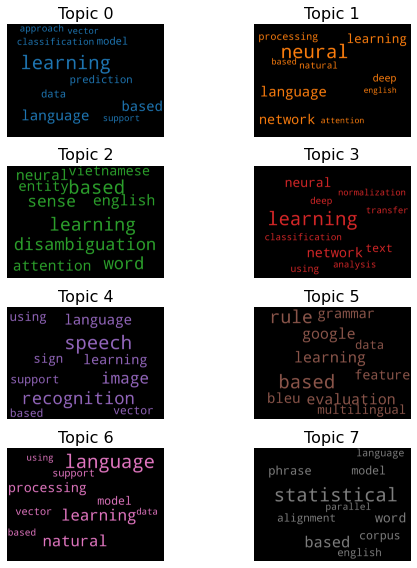

In [9]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldan.show_topics(formatted=False)

fig, axes = plt.subplots(4, 2, figsize=(8,8), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [10]:
from operator import itemgetter

corpus_transformed_s = ldan[corpusn]
#corpus_transformed = ldan[0][corpusn[0]]
#len(corpus_transformed)
corpos = []
corpo = []
for corp in corpus_transformed_s:
    if len(corp) > 1:
        corpo.append([max(corp, key=itemgetter(1))])
    else:
        corpo.append(corp)
csv_fileIEEE['Topic'] = corpo
#display the results for the IEEE database
csv_fileIEEE

,Document Title,Authors,Publication Year,Start Page,End Page,Pages count,Abstract,DOI,Link,Author Keywords,INSPEC Controlled Terms,Article Citation Count,Publisher,Document Identifier,Titles & Keywords,Method Used,Topic
0,Automatic Machine Translation of Poetry and a ...,A. A. Deshmukh; R. Prasad,2020,1034,1039,6,Automatic machine translation is gaining more ...,10.23919/MIPRO48935.2020.9245342,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,automatic machine translation;statistical and ...,computational linguistics;language translation...,NaN,IEEE,IEEE Conferences,poetry low resource language pair statistical...,"[statistical, neural]","[(1, 0.6251147)]"
1,Human Quality Evaluation of Machine-Translated...,A. A. Suryani; D. H. Widyantoro; A. Purwariant...,2020,1040,1045,6,The quality of literary translation was from t...,10.23919/MIPRO48935.2020.9245436,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,automatic machine translation;machine translat...,language translation;literature;natural langua...,NaN,IEEE,IEEE Conferences,human quality evaluation translated poetry qu...,[],"[(5, 0.55617565)]"
2,A Summary and Comparative Study of Different M...,A. A. Zhivotova; V. D. Berdonosov; E. V. Redkolis,2018,55,60,6,Assessment of the Translation done by machines...,10.1109/CONFLUENCE.2018.8442777,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,Machine Translation;MT Evaluation;Automatic Ev...,language translation;natural language processing,1.0,IEEE,IEEE Conferences,a summary comparative study different metric ...,[],"[(4, 0.9124265)]"
3,Statistical machine translation of Croatian we...,Ã–. Åžahin; A. KurtoÄŸlu; G. Ercan,2010,91,96,6,This research is a first step towards a system...,NaN,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,statistical machine translation;Croatian langu...,language translation;statistical analysis,NaN,IEEE,IEEE Conferences,statistical croatian weather forecast how dat...,[statistical],"[(6, 0.75311124)]"
4,Syntax Rectification of Speech Using Neural Ma...,A. Boni; A. Zorat,2018,306,311,6,Speech Recognition is the identification of sp...,10.1109/I-SMAC.2018.8653676,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,Automatic Speech Recognition;Neural Machine Tr...,audio signal processing;hidden Markov models;l...,NaN,IEEE,IEEE Conferences,syntax rectification speech using neural spee...,[neural],"[(4, 0.48411348)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,Statistical Machine Translation for Speech: A ...,D. H. Sanders,2013,1180,1202,23,"In this paper, we survey and analyze state-of-...",10.1109/JPROC.2013.2249491,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,Discriminative training;finite-state transduce...,graph theory;language translation;learning (ar...,4.0,IEEE,IEEE Journals,statistical speech a perspective structure le...,[statistical],"[(7, 0.966293)]"
906,A Multi-Anatomical Retinal Structure Segmentat...,S. A. Khalek; S. Khurshid,2018,1,23,23,Eye exam can be as efficacious as physical one...,10.1109/JTEHM.2018.2835315,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,Retina screening;retinopathy;retinal vessels s...,blood vessels;diseases;eye;feature extraction;...,NaN,IEEE,IEEE Journals,a multi anatomical retinal structure segmenta...,[],"[(4, 0.97346747)]"
907,Software Vulnerability Detection Using Deep Ne...,S. Bakhshaei; S. Khadivi; N. Riahi,2020,1825,1848,24,The constantly increasing number of disclosed ...,10.1109/JPROC.2020.2993293,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,Cybersecurity;deep neural network (DNN);machin...,data mining;language translation;learning (art...,6.0,IEEE,IEEE Journals,software vulnerability detection using deep n...,[neural],"[(1, 0.6185699)]"
908,"On the Future of Information: Reunification, C...",Y. Yuan; B. Babych; S. Sharoff,2016,1117,1140,24,The vulnerability of software and the Internet...,10.1109/ACCESS.2016.2524403,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,Informatics;Machine Intelligence;National Secu

#Find Approaches